# Project Part 1: Examining the Case Study Data in a Jupyter Notebook

## First Jupyter notebook
Welcome to your first Jupyter notebook! Jupyter notebooks consist of a sequence of cells. There are two kinds of cells: markdown for text commentary and code for Python code. This is a markdown cell. There are two modes: Command mode is default. Move to edit mode by selecting a cell and pressing the Enter key. Go back to Command mode by pressing the Esc key. Render a markdown cell, or run a code cell by the Shift-Enter key combination.

There are a lot of different ways to mark up the text in markdown cells using codes, including __bold__ and *italics*. This cell is a level 2 header, signaled by the pound signs above. The number of pound signs determines the level of header. The title in the first cell is level 1. Note also the Cell, Edit, and Insert menus. In the Cell menu you can change the cell type, which also can be done on the toolbar box that says either 'Markdown' or 'Code'. Edit allows deletion and copying and pasting among other things. Insert has commands for insertion of cells. 

The next one will be a `code` cell. The pandas package allows for moving data sets in and out as so-called 'data frames' and manipulating them. Using methods (that is functions) in a package like pandas is made easier by giving the package a short nickname, then calling on that method with the syntax: nickname.methodname(parameters of method).

In [1]:
import pandas as pd

This command loads the project data file from the folder in which the notebook you are currently using resides. Jupyter will need a full pathname to find it if the notebook and data file are in different folders.

In [2]:
df = pd.read_excel('CreditDefaultData.xls')

The data is now in a frame with examples in rows and features in columns. The shape method tells us how many rows and columns there are.

In [3]:
df.shape

(30000, 25)

The columns method shows the names of the 25 columns. The head method (note the empty parentheses in the syntax) gives a quick look at the first few rows of the frame and some of the columns.

In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Verifying Basic Data Integrity

In any data frame that you need to work with, there can be problems with the data integrity. One of those problems is duplicate entries for one or more of the examples (rows). Remember that we have 30000 rows. A method that can be used with data frames like our df frame is nunique(), which returns the number of unique entries in a particular column, like the 'ID' column. By the way, to refer to one column in a data frame, use the syntax: dataframename['column name']. 

### Exercise 1: Write a command to count the number of unique ID's and therefore to compute the overall number of duplicate examples. 

In [6]:
df['ID'].nunique()

29687

In [7]:
df.shape[0]-df['ID'].nunique()

313

Therefore, there are 30000 - 29687 = 313 duplicate ID's. 

The value_counts() method applied to a data frame column returns a list of how many of each unique column value there are. Its structure is that of an indexed list, where the indices are the unique column values and the list entries are the counts.

### Exercise 2: Write a command to form a list of counts of the unique ID's, and then use the head() method on that list to look at the first few. Then, use the value_counts method on this list. What output do you get, and what is it telling you?

In [8]:
unique_id = pd.Series(df['ID'].unique())

In [9]:
unique_id.head(5)

0    798fc410-45c1
1    8a8c8f3b-8eb4
2    85698822-43f5
3    0737c11b-be42
4    3b7f77cc-dbc0
dtype: object

In [10]:
unique_id.value_counts()

798fc410-45c1    1
d946a2a4-178f    1
25d37701-65a9    1
1cb50343-5aa1    1
828225e5-c27a    1
                ..
01f5969d-0026    1
058a406a-f310    1
cbaa9da1-ed61    1
4795c5d3-3b43    1
15d69f9f-5ad3    1
Length: 29687, dtype: int64

##### It shows every value is unique and it only appears once. The length of the list mathces the number we found in ex1.

   It is an interesting coincidence that all duplicate entries are in pairs rather than triples, quadruples, etc. There could be something special about the duplications relative to other data columns. 
   To investigate, we need to pick out the duplicated ID's, using a mask. In general, you can use a Boolean condition to form a subset of a data frame consisting only of those rows satisfying a condition. Boolean conditions are set up using the double equal syntax a == b. A masked subset can be formed by the command mask_subset_name = Boolean condition on data frame, for example, mymaskdb = targetdataframe['variablename'] == value. 

### Exercise 3: Examining Duplicates: Mask your frame of counts from Exercise 2 using a condition that checks for count values equal to 2. Then use the index[maskname] method on the list of counts to form a set of duplicate ids, which for technical reasons you need to convert to a Python list using the list(setname) function. Then use the isin method for data frames to return a data frame consisting of only the duplicate entries. Example code is below, assuming that the name of the indexed counts list is id_counts. Modify the code using your own name from Exercise 2, and display the first 6 entries of the frame of duplicates. Draw a conclusion: What do most of the duplicated rows have in common?

In [11]:
id_counts = df['ID'].value_counts()

In [12]:
dupe_mask = id_counts == 2

In [13]:
dupe_mask[0:6]

ad23fe5c-7b09    True
1fb3e3e6-a68d    True
89f8f447-fca8    True
7c9b7473-cc2f    True
90330d02-82d9    True
2a793ecf-05c6    True
Name: ID, dtype: bool

In [14]:
id_counts.index[0:8]

Index(['ad23fe5c-7b09', '1fb3e3e6-a68d', '89f8f447-fca8', '7c9b7473-cc2f',
       '90330d02-82d9', '2a793ecf-05c6', '75938fec-e5ec', '7be61027-a493'],
      dtype='object')

In [15]:
dupe_ids = id_counts.index[dupe_mask]

In [16]:
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

In [17]:
dupe_ids[0:8]

['ad23fe5c-7b09',
 '1fb3e3e6-a68d',
 '89f8f447-fca8',
 '7c9b7473-cc2f',
 '90330d02-82d9',
 '2a793ecf-05c6',
 '75938fec-e5ec',
 '7be61027-a493']

In [18]:
df.loc[df['ID'].isin(dupe_ids[0:3]),:]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,...,169371,172868,150827,8000,8000,5500,6100,6000,5000,0
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16727,1fb3e3e6-a68d,80000,1,2,2,33,2,2,0,0,...,27394,29922,31879,0,2000,2000,3000,2600,0,1
16827,1fb3e3e6-a68d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29685,ad23fe5c-7b09,50000,1,3,1,32,0,0,0,0,...,12882,8131,3983,3000,2871,1000,163,3983,3771,1
29785,ad23fe5c-7b09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We see most duplicated rows are having a zero row with the same name.

It is worth our while to eliminate the zero rows and check to see if that solves the duplicate entry problem.

### Exercise 4. Now we remove all the rows with all zero features. Modify the code below so that it has your own variable names to create a cleaned data frame. Now check as in previous exercises for the shape of this new data frame, and see whether it has all unique IDs. When done, use the to_csv('filename.csv', index=False) method on your cleaned data to save it to a csv formatted file for future use.

This command creates a Boolean data frame of the same size and shape as the original, containing True in any row and column with a zero, and False otherwise.

In [19]:
df_zero_mask = df == 0

This complicated looking command produces a mask on the Boolean data frame for all rows and columns from 1 to the end (column 0 is the ID column) for which True occurs everywhere in those columns. The method all(axis=1) checks row-wise for the condition that all columns after the ID column are True.

In [20]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)

Summing a Boolean array like this codes True as 1 and False as 0, so it returns the number of rows with all zeros in the data.

In [21]:
sum(feature_zero_mask)

315

Using the logical 'not' operator ~, the loc[] subset selection method and the copy() method on the original data, we create a cleaned copy of the original data set which has no zero rows.

In [22]:
df_clean_1 = df.loc[~feature_zero_mask,:].copy()

Save progress for next exercise.

In [23]:
df_clean_1.to_csv('df_clean_1.csv', index=False)

### Exercise 5: Use the read_csv method for pandas data frames to read the cleaned data frame from the last exercise back in, and then use the info() method to display information about the columns and data types of those columns. Do you see anything unusual about one of the variables? If so, use the value_counts() method to display counts of values for that variable. What seems inconsistent with our information about what is supposed to be in this database?

In [24]:
import pandas as pd

In [25]:
df_clean_1 = pd.read_csv('df_clean_1.csv')

In [26]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29685 entries, 0 to 29684
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

###### Yes, the unusual variable is PAY_1. It supposed to be a int64 data type but it's an object.

In [27]:
df_clean_1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

###### We see there are 3021 values are Not available which cause the data type to be an object.

   We contact our client again about the negative and zero values, who now explains to us that -2 means that the account started with a zero balance and no credit was used; -1 means that the account had a balance that was paid in full, and 0 means that at least the minimum payment was made, but the balance wasn't paid in full.

### Exercise 6: Since we still have an amply sized database, let's throw out the rows with missing values for PAY_1 now. Use the techniques of the previous exercises,editing as necessary below for your own names, to create a mask selecting the good ones, for which the first cleaned data frame is not equal to 'Not available' in the 'PAY_1' column. The boolean operator != signifies "not equal to". How many rows and columns are in the newly cleaned frame? Redo the value_counts method on the new frame. The command dataframename['columnvariablename']=dataframename['columnvariablename'].astype('int64')                               using the astype method will then convert the named column to integer form; do that for your newly cleaned PAY_1 column. Use the info method to check that all variables that should be integer are indeed integer. Finally, save the new data frame to a csv file. 

In [28]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'

In [29]:
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [30]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()

In [31]:
df_clean_2.shape

(26664, 25)

In [32]:
df_clean_2['PAY_1'].value_counts()

0     13087
-1     5047
1      3261
-2     2476
2      2378
3       292
4        63
5        23
8        17
6        11
7         9
Name: PAY_1, dtype: int64

In [33]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')

In [34]:
df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29684
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  int64 
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  in

Save progress

In [35]:
df_clean_2.to_csv('df_clean_2.csv', index=False)

Next we illustrate histograms and summary statistics of numerical data in Python. First load in the matplotlib plotting library, and increase the plot resolution by running the commands below. The hist() and describe() methods on a numerical variable are shown for LIMIT_BAL below. A group of variables separated by commas can also be done all at once. At the page https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html you can find optional parameters for hist(), including binning, density style, and cumulative histograms. The most important argument for describe() is percentiles = [list of decimal values], where the default is [.25,.50,.75].

In [44]:
import matplotlib as mpl #additional plotting functionality

mpl.rcParams['figure.dpi'] = 100 #high resolution figures

In [37]:
df_clean_2 = pd.read_csv('df_clean_2.csv')

<AxesSubplot:>

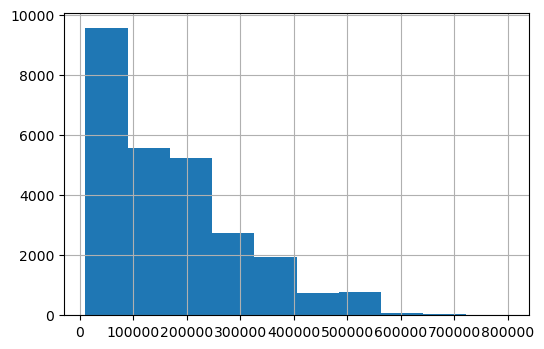

In [45]:
df_clean_2['LIMIT_BAL'].hist()

<AxesSubplot:>

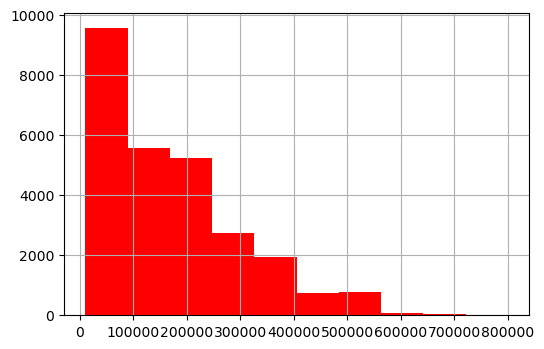

In [46]:
df_clean_2['LIMIT_BAL'].hist(color = 'red')

In [40]:
df_clean_2['LIMIT_BAL'].describe()

count     26664.000000
mean     167919.054905
std      129839.453081
min       10000.000000
25%       50000.000000
50%      140000.000000
75%      240000.000000
max      800000.000000
Name: LIMIT_BAL, dtype: float64

In [41]:
df_clean_2['LIMIT_BAL'].describe(percentiles = [.10,.25,.50,.75,.90])

count     26664.000000
mean     167919.054905
std      129839.453081
min       10000.000000
10%       30000.000000
25%       50000.000000
50%      140000.000000
75%      240000.000000
90%      360000.000000
max      800000.000000
Name: LIMIT_BAL, dtype: float64

### Exercise 7: Now do histgrams and summaries for LIMIT_BAL and AGE together. Note that you will probably have to use double brackets [[ ]] around a list of multiple features. 

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'AGE'}>]], dtype=object)

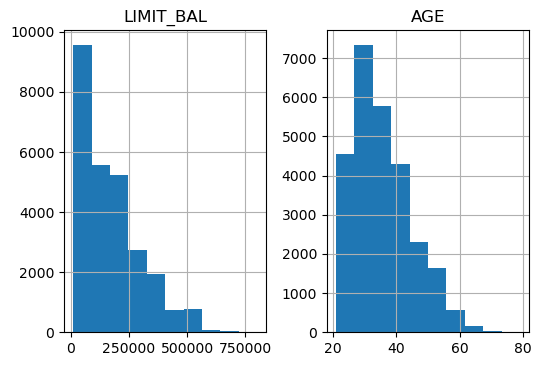

In [47]:
df_clean_2[['LIMIT_BAL','AGE']].hist()

In [48]:
df_clean_2[['LIMIT_BAL','AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


### Exercise 8. The EDUCATION and MARRIAGE variables turn out to be strange as well. Education (1 = graduate school; 2 = university; 3 = high school; 4 = others); Marriage (1 = married; 2 = single; 3 = others). Use the value_counts method to find what values are actually in those variables. 

In [49]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

In [50]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

##### We see there are some unidentified values: 0, 5, and 6 in EDUCATION and 0 in MARRIAGE 

### Exercise 8 (cont.) The code below shows how to replace the odd values, 0, 5, and 6, in the EDUCATION variable by 4 signifying others. Modify and carry it out for your data frame, and adapt it to replace the bad values in the MARRIAGE variable, and check the value counts to be sure it worked. Then save your result to a new csv file.

In [51]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)

In [52]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [55]:
df_clean_2['MARRIAGE'].replace(to_replace=[0], value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

Save progress

In [56]:
df_clean_2.to_csv('df_clean_2_01.csv', index=False)

## Exercise 9: Implementing One-Hot Encoding for the Education feature. Using the name that you chose for the cleaned data frame in the previous exercise, modify the code below to (a) read that data back in, (b) create a new string variable 'EDUCATION_CAT' with empty values, (c) look at the first 12 values (that is modify my code), (d) replace the EDUCATION numerical codes by the strings shown using a mapping, (e) check those first 12 values of both variables again, (f) use the get_dummies() method on EDUCATION_CAT to form a new frame of indicator variables for the categories, (g) use the concat() method as shown to append the dummy variables to the data frame, and (h) save your progress to a file of your own chosen name for use in the next phase of the project. How would you use raw Python code instead of get_dummies to make your own indicator variables?

In [57]:
df_clean_2 = pd.read_csv('df_clean_2_01.csv')

In [58]:
df_clean_2['EDUCATION'].head()

0    2
1    2
2    2
3    2
4    2
Name: EDUCATION, dtype: int64

Make a new column of categorical strings, using the data dictionary

In [59]:
df_clean_2['EDUCATION_CAT'] = 'none'

In [60]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(12)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


"Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)"

In [61]:
cat_mapping = {1: "graduate school",
               2: "university",
               3: "high school",
               4: "others"}

In [62]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)

In [63]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(12)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [64]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(12)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [65]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school',
             'high school', 'university', 'others']].head(12)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


Save the fruits of your exploratory labors

In [66]:
df_with_ohe.to_csv('cleaned_data.csv', index=False)

### My code for One-hot Encoding

In [67]:
### Read the file
df_clean_2 = pd.read_csv('df_clean_2_01.csv')

In [85]:
### my mapping (reversed)

my_cat_mapping = {"graduate school": 1,
               "university": 2,
               "high school": 3,
               "others": 4}

### Get the 'EDUCATION_CAT' column
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)

In [86]:
print(df_clean_2['EDUCATION_CAT'])

0         university
1         university
2         university
3         university
4         university
            ...     
26659    high school
26660    high school
26661     university
26662    high school
26663     university
Name: EDUCATION_CAT, Length: 26664, dtype: object


In [87]:
### define my one_hot_encoding function:

def one_hot_encoding(strng, dic):
    vector = [[0 if char != letter else 1 for char in dic] 
                for letter in strng]
    return vector

In [100]:
### Use Pandas.Series to name the list as ''ONE_HOT_VEC''

edu_my_ohe = pd.Series(one_hot_encoding(df_clean_2['EDUCATION_CAT'], my_cat_mapping), name = 'ONE_HOT_VEC' )
print(edu_my_ohe)

0        [0, 1, 0, 0]
1        [0, 1, 0, 0]
2        [0, 1, 0, 0]
3        [0, 1, 0, 0]
4        [0, 1, 0, 0]
             ...     
26659    [0, 0, 1, 0]
26660    [0, 0, 1, 0]
26661    [0, 1, 0, 0]
26662    [0, 0, 1, 0]
26663    [0, 1, 0, 0]
Name: ONE_HOT_VEC, Length: 26664, dtype: object


In [104]:
### Print it

df_with_my_ohe = pd.concat([df_clean_2, edu_my_ohe], axis=1)
df_with_my_ohe[['EDUCATION', 'EDUCATION_CAT','ONE_HOT_VEC']]

,EDUCATION,EDUCATION_CAT,ONE_HOT_VEC
0,2,university,"[0, 1, 0, 0]"
1,2,university,"[0, 1, 0, 0]"
2,2,university,"[0, 1, 0, 0]"
3,2,university,"[0, 1, 0, 0]"
4,2,university,"[0, 1, 0, 0]"
...,...,...,...
26659,3,high school,"[0, 0, 1, 0]"
26660,3,high school,"[0, 0, 1, 0]"
26661,2,university,"[0, 1, 0, 0]"
26662,3,high school,"[0, 0, 1, 0]"
